In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# Import standard libraries
import os, sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import astropy.units as units

In [3]:
import chimera

/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /Users/lustija1/Documents/PandExo_data/pysynphot_data/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:117: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmg.fits
  warnings.warn('No graph or component tables found; '
/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/pysynphot/refs.py:124: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /Users/lustija1/Documents/PandExo_data/pysynphot_data/mtab/*_tmt.fits
  warnings.warn('No thermal tables found, '


In [4]:
import coronagraph as cg
import smarter; smarter.utils.plot_setup()

## CHIMERA currently has the `make_stellar()` function

In [5]:
print(chimera.make_stellar.__doc__)


    Make stellar using pysynphot

    Parameters
    ----------
    temp : float
        temperature
    logMH : float
        log stellar metallicity
    logg : float
        stellar logg
    database : str
        Stellar database to choose from
    outfile : str
        stellar h5 output file
    write_file : bool
        Set to create a stellar h5 file
    return_spectrum : bool
        Set to return the spectrum: `wave, fluxmks`

    Returns
    -------
    N/A just output file
    


In [6]:
import pysynphot as psyn

In [7]:
print(psyn.Icat.__doc__)

This class constructs a model from the grid available in
    :ref:`catalogs <pysynphot-spec-atlas>`.
    Specifically, they are :ref:`pysynphot-appendixa-ck04`,
    :ref:`pysynphot-appendixa-kurucz1993`, and
    :ref:`pysynphot-appendixa-phoenix`.

    Each grid contains a master file named "catalog.fits", as
    defined by ``pysynphot.locations.CAT_TEMPLATE``.
    The basis spectra are located at ``pysynphot.locations.KUR_TEMPLATE``.
    You may inspect the data files in CRDS to see how they
    are formatted.

    Parameters
    ----------
    catdir : {'ck04models', 'k93models', 'phoenix'}
        Name of directory holding the catalogs.

    Teff : float
        Effective temperature of model, in Kelvin.

    metallicity : float
        Metallicity of model.

    log_g : float
        Log surface gravity of model.

    Attributes
    ----------
    name : str
        Short description of the spectrum.

    parameter_names : list of str
        Names for model parameters. This is use

In [8]:
# File to be created
stellar_file = 'sum_star.h5'

# Set Parameters
temp = 5000    # Effective temperature of model, in Kelvin: Between 2,000,  70,000
logmh = 0     # Log Metallicity of mode: Between -4, 0.5
logg = 4.0     # Log surface gravity of model: Between 0.0, 5.5
stellar_db = 'phoenix'

# Call make stellar 
wl_star, f_star = chimera.make_stellar(temp, logmh, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6

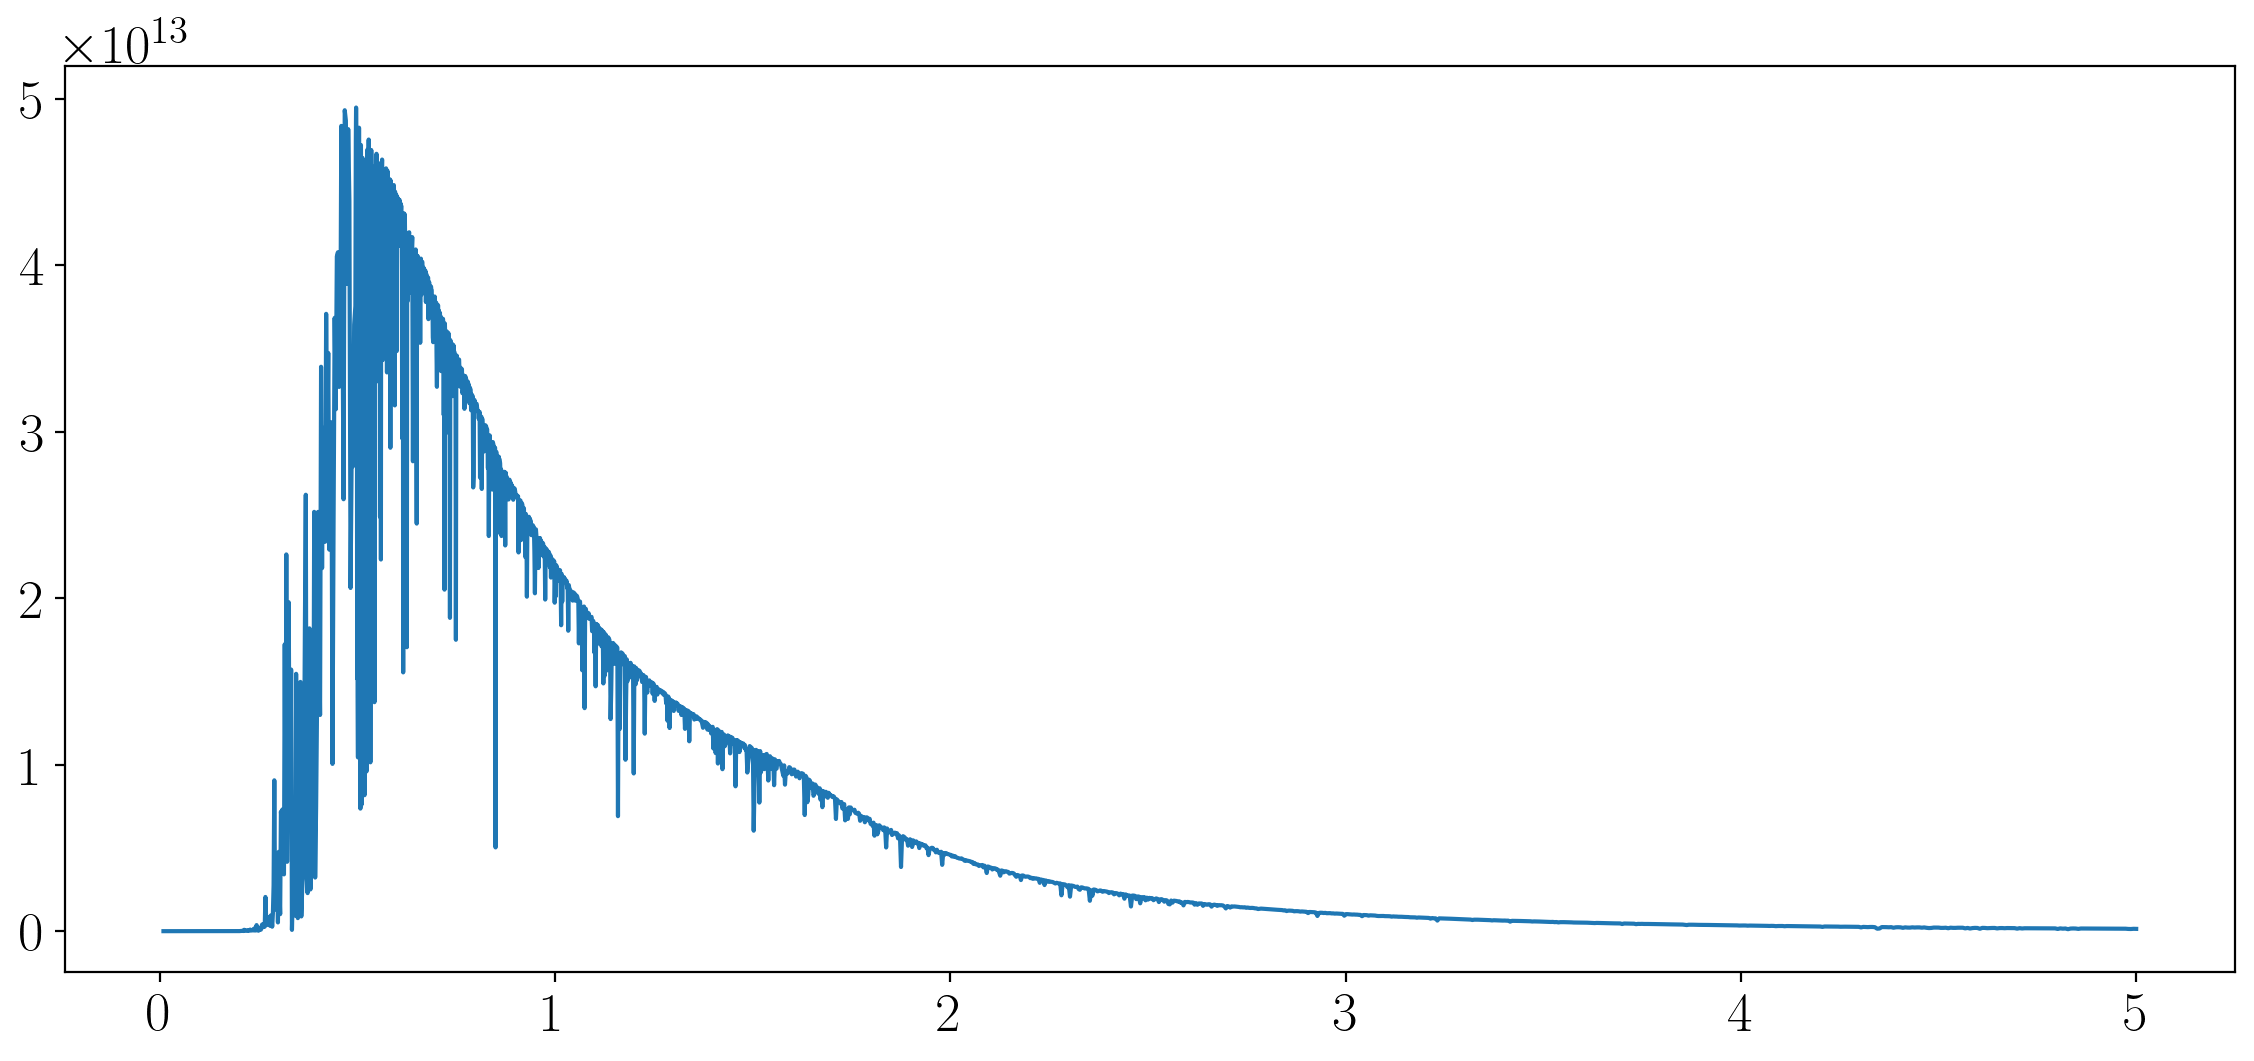

In [9]:
m = (wl_star > 0.01) & (wl_star < 5.0)

fig, ax = plt.subplots(figsize = (14, 6))
ax.plot(wl_star[m], f_star[m])

(0.001, 1e+21)

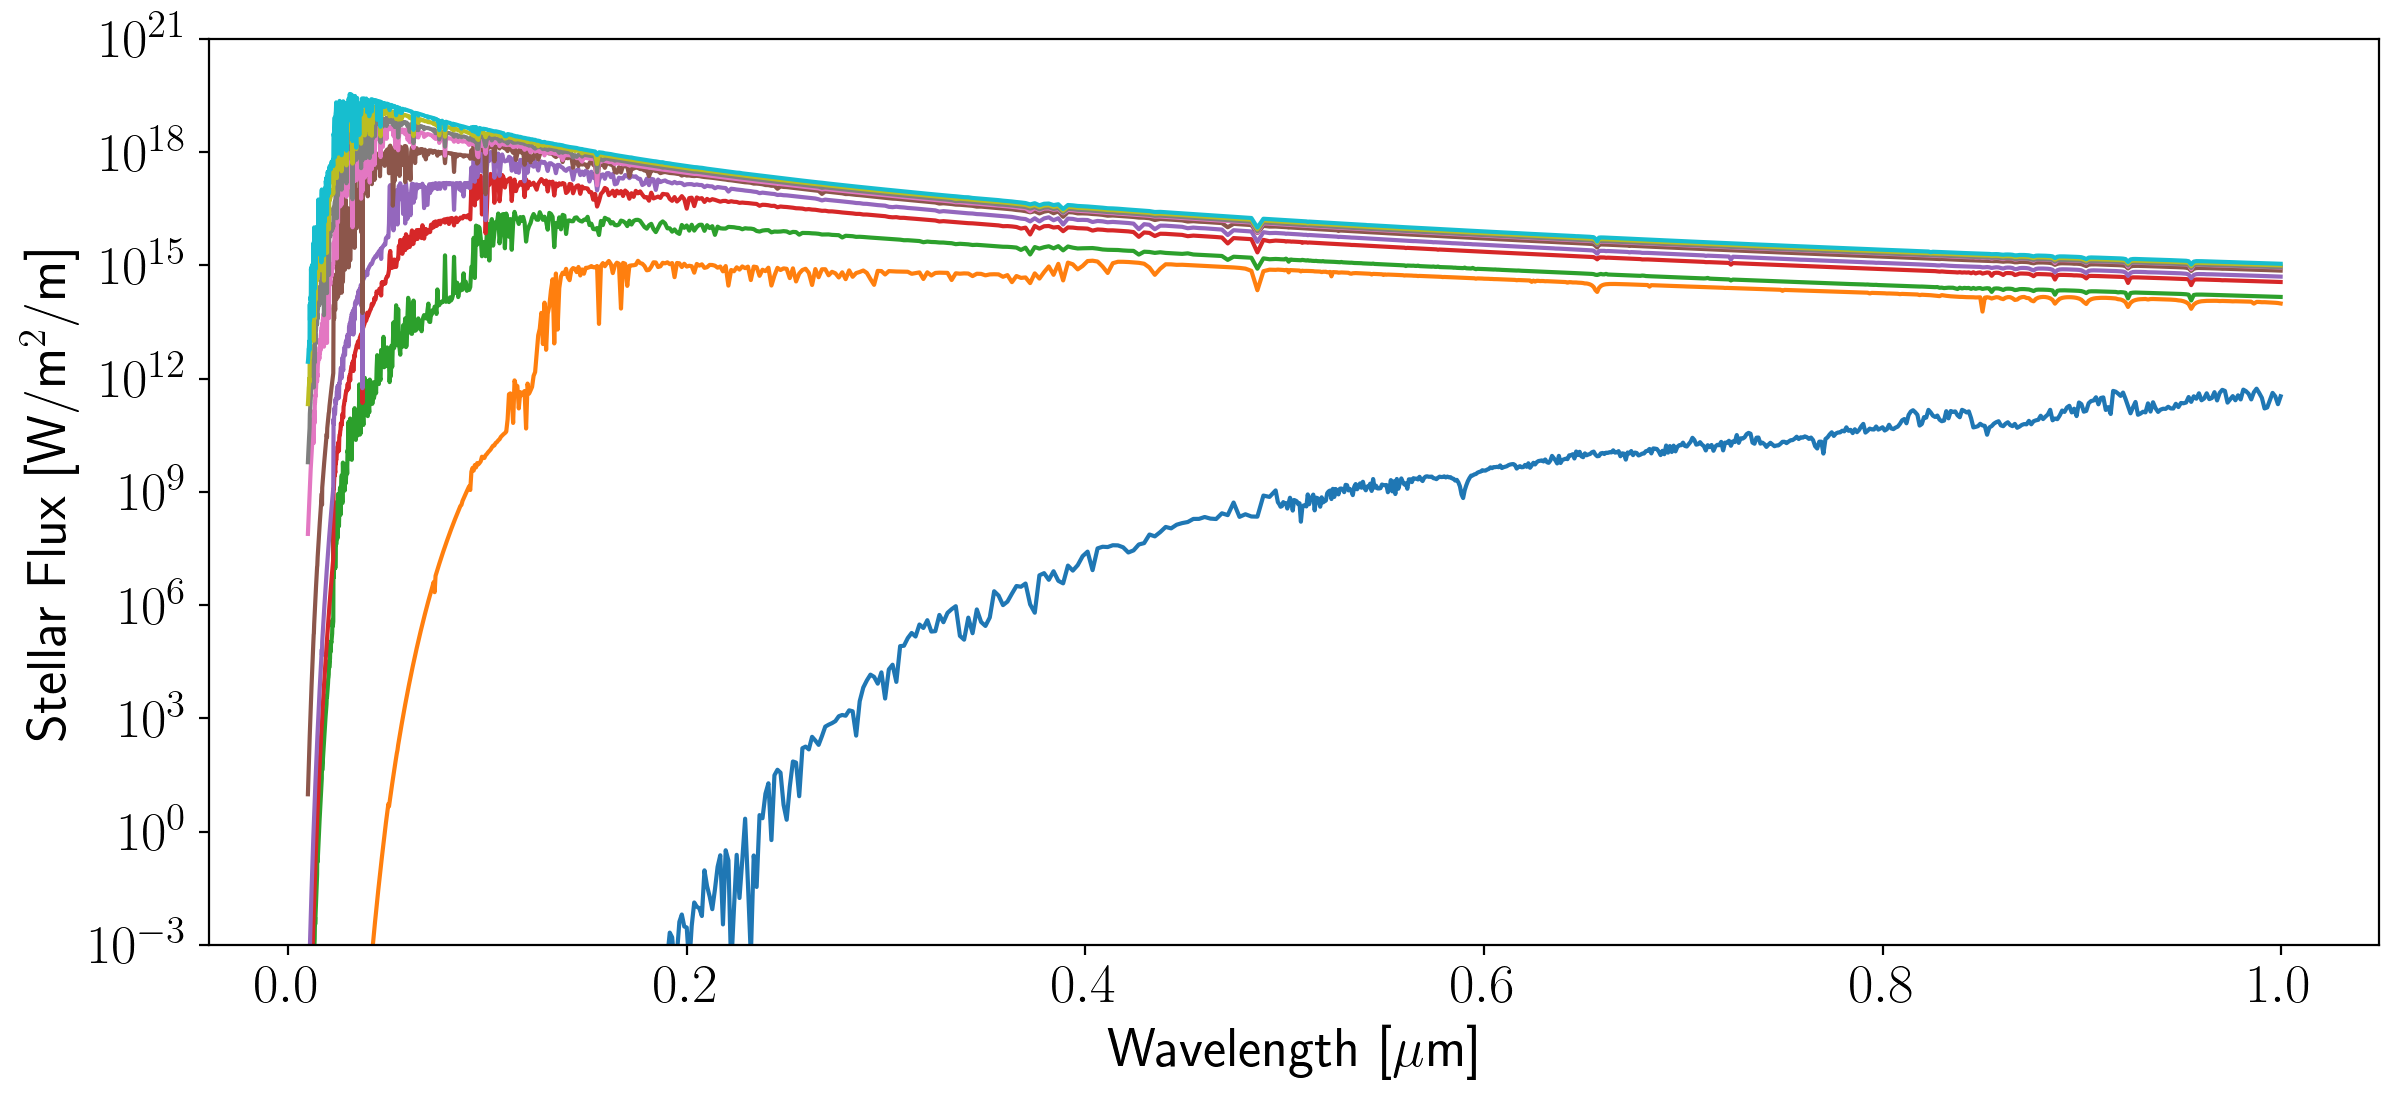

In [10]:
Ts = np.linspace(2000, 70000, 10)
logmhs = np.linspace(-4, 0.5, 10)
loggs = np.linspace(0.0, 5.5, 10) 

fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Stellar Flux [W/m$^2$/m]")

for i, T in enumerate(Ts):
    
    wl_star, f_star = chimera.make_stellar(T, logmh, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
    
    wl_star = wl_star * 1e6
    m = (wl_star > 0.01) & (wl_star < 1.0)
    ax.plot(wl_star[m], f_star[m])
    
ax.set_yscale("log")
ax.set_ylim(bottom = 1e-3, top = 1e21)


In [11]:
%timeit chimera.make_stellar(temp, logmh, logg, stellar_db, stellar_file, write_file=True, return_spectrum=False)

77.2 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Just added `make_stellar_multicomponent()`

In [12]:
from chimera import make_stellar, make_stellar_multicomponent

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


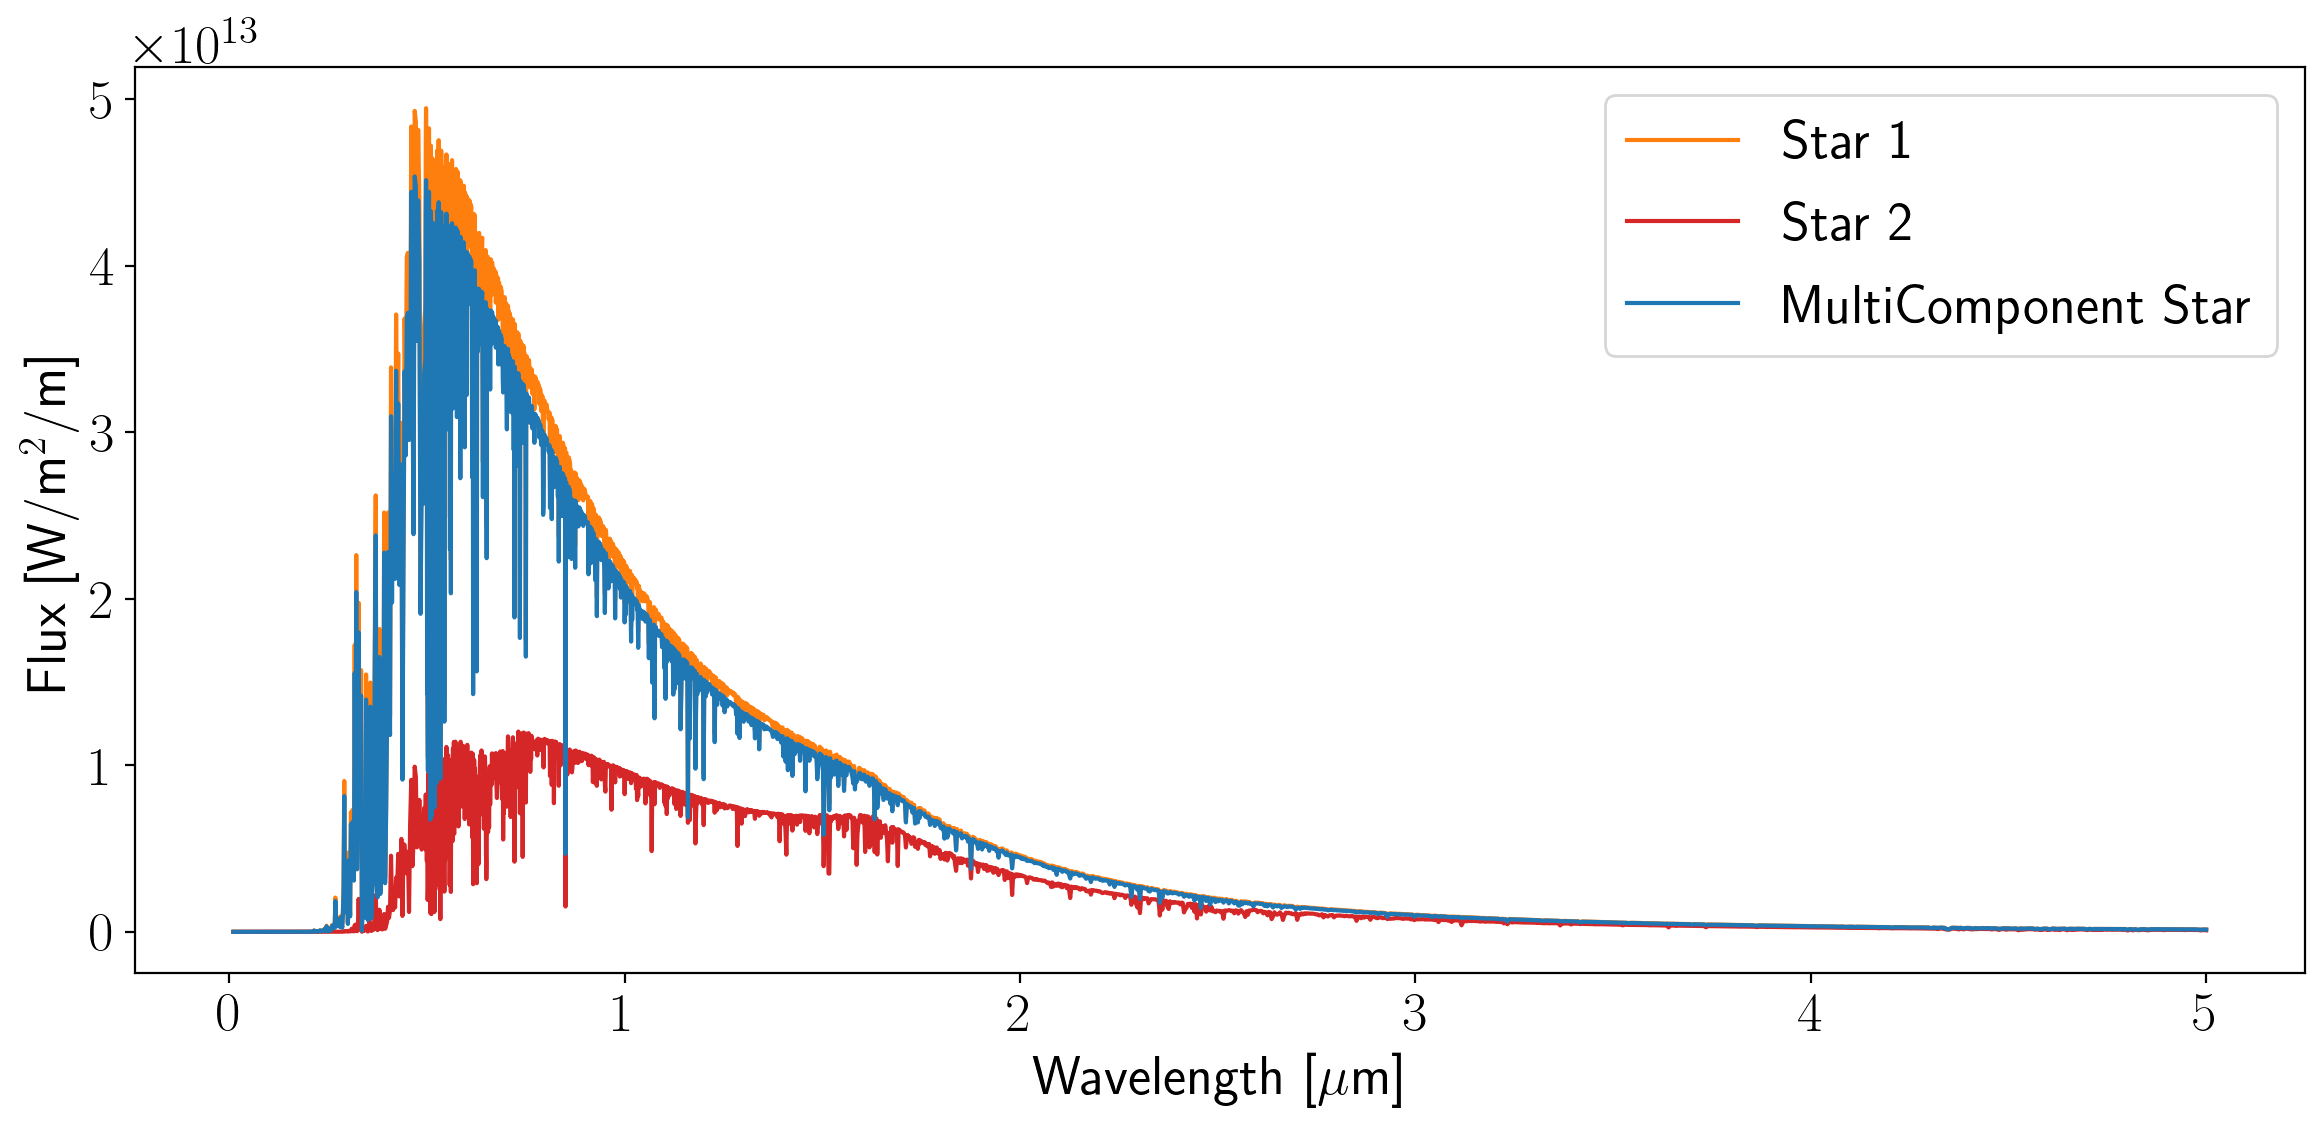

In [13]:
# Define a stellar spectrum with 2 spectral components 
fracs = [0.9, 0.1] 
Ts = [5000, 4000] 
logmhs = [0.0, 0.0] 
loggs = [4.0, 4.0]

# Make figure canvas
fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Flux [W/m$^2$/m]")

# Star 1
wl_star, f_star = make_stellar(Ts[0], logmhs[0], loggs[0], stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], color = "C1", label = "Star 1")

# Star 2
wl_star, f_star = make_stellar(Ts[1], logmhs[1], loggs[1], stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], label = "Star 2", color = "C3")

# Multi Star
wl_star, f_star = make_stellar_multicomponent(fracs, Ts, logmhs, loggs, 
                                       stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = 1e6 * wl_star
m = (wl_star > 0.01) & (wl_star < 5.0)
ax.plot(wl_star[m], f_star[m], label = "MultiComponent Star", color = "C0")

ax.legend()

In [ ]:
def stellar_flux(Rs, d, Teff, logMH, logg, fracs = None, stellar_db = 'phoenix'):
    """
    """
        
    # Use pysynphot to get stellar spectrum MKS (m, W/m2/m)
    lambdastar, Fstar0 = make_stellar(Teff, logMH, logg, stellar_db, 'throwaway.h5', write_file=False, return_spectrum=True)

    # Convert m-->µm
    lambdastar=lambdastar*1e6
    loc=np.where((lambdastar >= 1e4/wno[-1]) & (lambdastar <=1e4/wno[0]))
    lambdastar=lambdastar[loc]
    lambdastar_hi=np.arange(lambdastar.min(),lambdastar.max(),0.0001)
    Fstar0=Fstar0[loc]
    Fstar0=interp(np.log10(lambdastar_hi), np.log10(lambdastar), Fstar0)

    #smooth stellar spectrum to CK bins
    """
    # Do this 
    szmod=len(wno)
    Fstar_smooth=np.zeros(szmod)
    dwno=wno[1:]-wno[:-1]
    for i in range(szmod-1):
        i=i+1
        loc=np.where((1E4/lambdastar_hi >= wno[i]-0.5*dwno[i-1]) & (1E4/lambdastar_hi < wno[i]+0.5*dwno[i-1]))
        Fstar_smooth[i]=np.mean(Fstar0[loc])

    Fstar_smooth[0]=Fstar_smooth[1]
    Fstar_smooth[-1]=Fstar_smooth[-2]
    Fstar=Fstar_smooth
    """
    
    Fstar_obs = Fstar0 * ( Rs * u.Rsun.in_units(u.m) / (d * u.pc.in_units(u.m)))**2
    
    return 

## Generate Some Fake Stellar Data 

<ErrorbarContainer object of 3 artists>

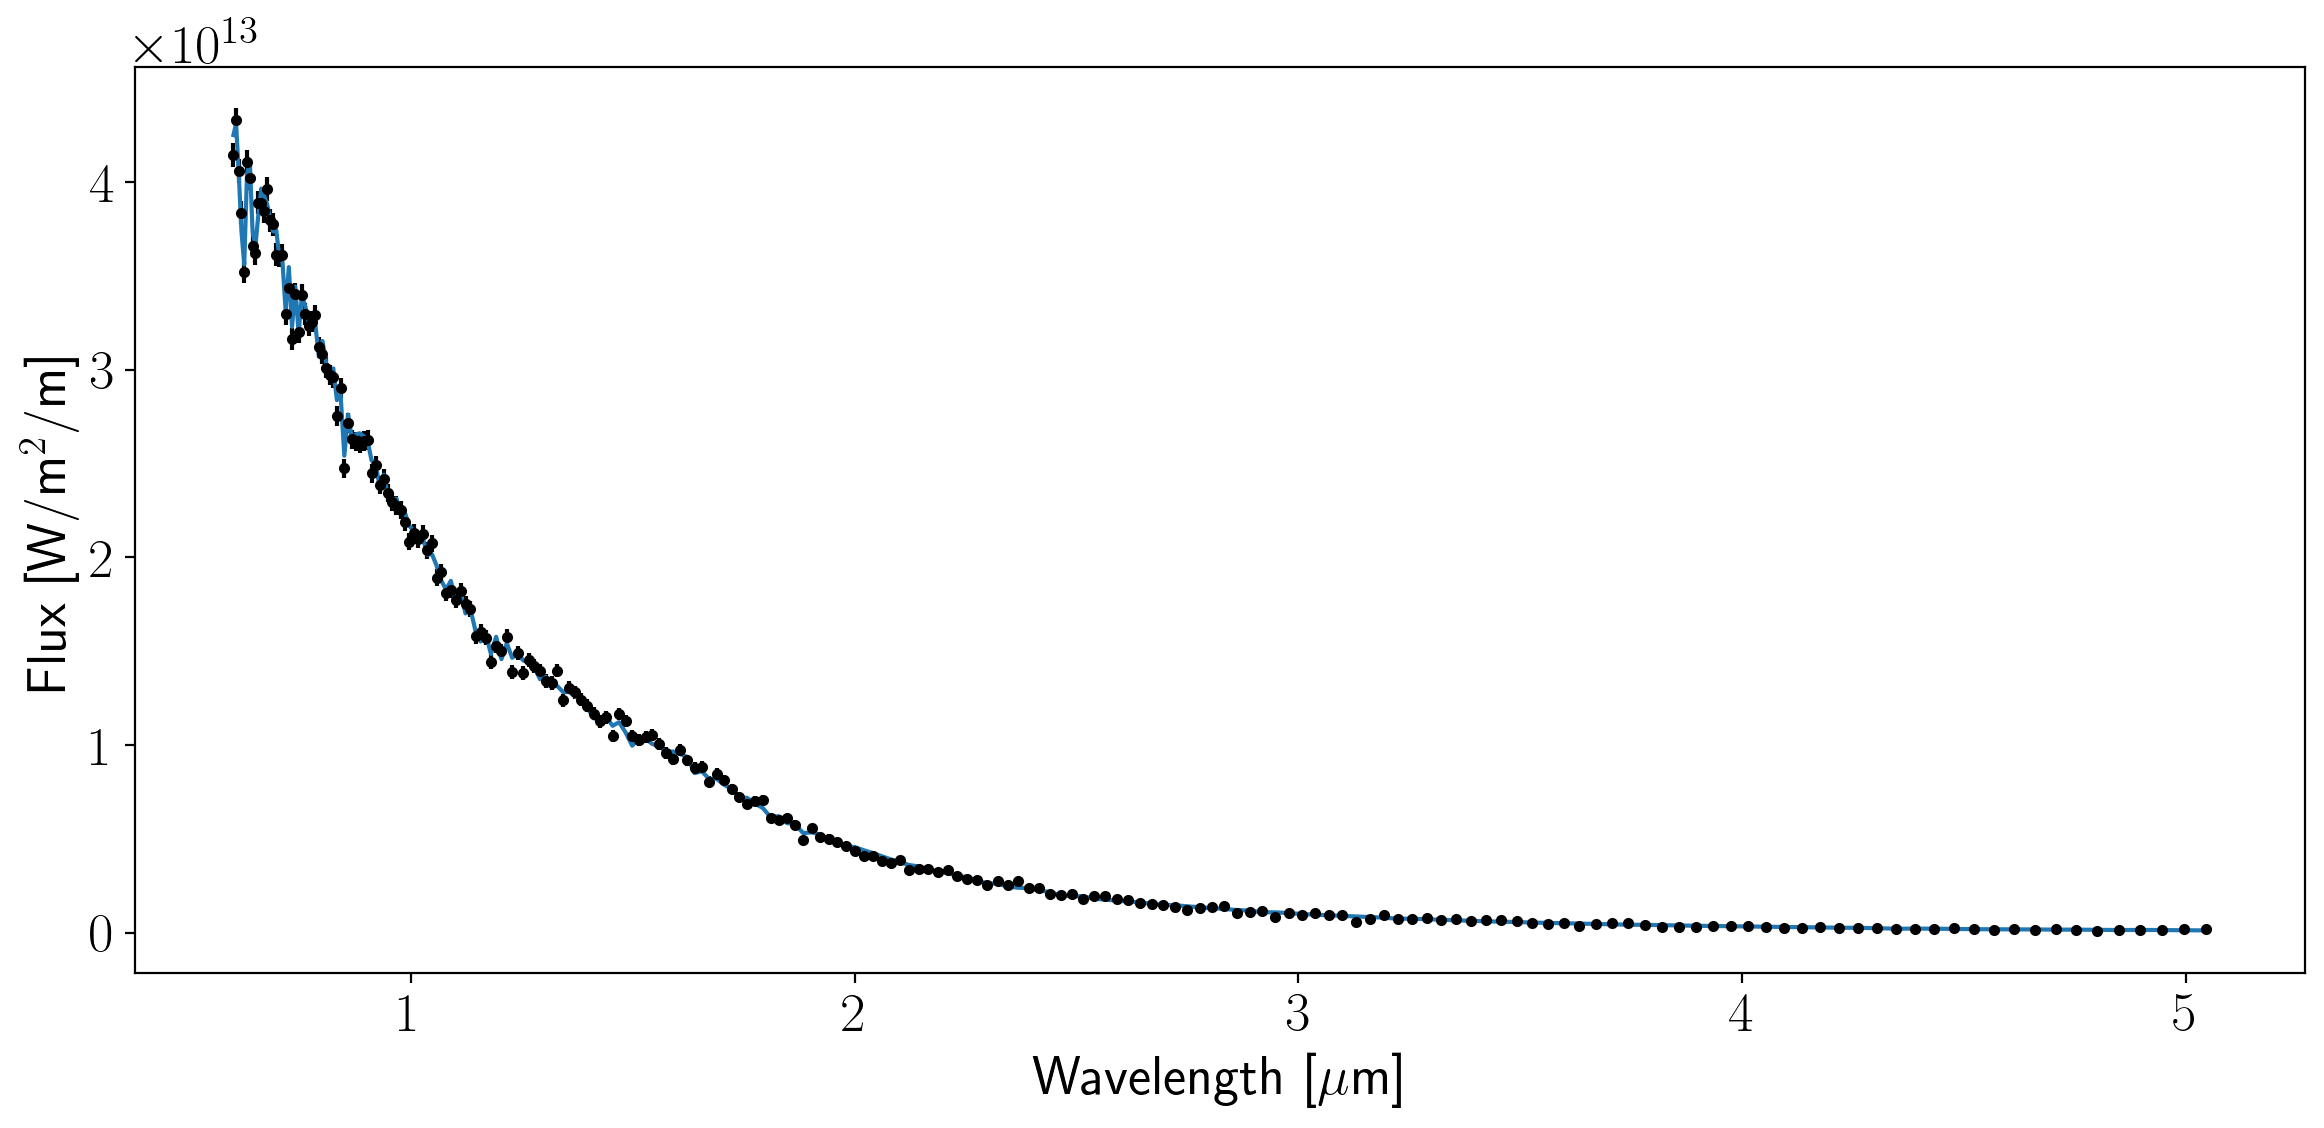

In [14]:
theta = [5000., 0.0, 4.0]

T = theta[0]
logm = theta[1]
logg = theta[2]

wl_star, f_star = make_stellar(T, logm, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
wl_star = wl_star * 1e6

lam, dlam = cg.noise_routines.construct_lam(0.6, 5.0, Res = 100.0)

fslo = cg.downbin_spec(f_star, wl_star, lam, dlam=dlam)

err = 1e5 * np.sqrt(fslo)

SNR = fslo / err

# Calculate Gaussian noise
gaus = np.random.randn(len(lam))

# Add gaussian noise to observed data
fsobs = fslo + err * gaus


# Make figure canvas
fig, ax = plt.subplots(figsize = (14, 6))
ax.set_xlabel("Wavelength [$\mu$m]")
ax.set_ylabel("Flux [W/m$^2$/m]")
ax.plot(lam, fslo, c="C0")
ax.errorbar(lam, fsobs, yerr = err, fmt = ".", color = "k")
#ax.set_yscale("log")

## Fit using `emcee`

In [15]:
import emcee, corner

In [16]:
def llike(theta, x, y, yerr):
    
    T = theta[0]
    logm = theta[1]
    logg = theta[2]

    try:
        wl_star, f_star = make_stellar(T, logm, logg, stellar_db, stellar_file, write_file=False, return_spectrum=True)
        wl_star = wl_star * 1e6
    except:
        return -np.inf

    lam, dlam = cg.noise_routines.construct_lam(0.6, 5.0, Res = 100.0)

    ym = cg.downbin_spec(f_star, wl_star, lam, dlam=dlam)
    
    # Calculate log-likelihood
    ll = -0.5*np.sum((y-ym)**2/yerr**2)  #your typical "quadratic" or "chi-square"
    
    return ll

def lprior(theta):
    
    T = theta[0]
    logm = theta[1]
    logg = theta[2]
    
    if (T < 2000.) or (T > 70000.):
        return -np.inf
    if (logm < -4.0) or (logm > 0.5):
        return -np.inf
    if (logg < 0.0) or (logg > 5.5):
        return -np.inf
    
    return 0.0 

def lprob(theta, x, y, yerr):
    
    lp = lprior(theta)
    
    if np.isfinite(lp):
        return llike(theta, x, y, yerr)
    
    return -np.inf

In [17]:
from smarter.utils import nsig_intervals

def plot_mcmc_trace(tag, labels = None, iteration = None, plt_path = "", bins = 20,
                    iburn0 = 0, accept_quantiles = [0.1, 0.5, 0.9],
                    saveplot = True, chain_alpha = 0.3, show_quantiles = False, 
                    emcee_backend = None):

    """
    Plot the evolution of MCMC chains as a function of iteration in a
    "trace plot".

    Parameters
    ----------
    tag : str
        Name of simulation
    labels : list
        List of string labels
    iteration : int
        Iteration number to append to tag
    plt_path : str
        Location to save plots
    bins : int
        Number of histogram bins
    iburn0 : int
        Initial burn-in cut
    accept_quantiles : list
        Thin chains by quantile
    saveplot : bool
        Set to save figure
    chain_alpha : float
        Chain plot alpha
    show_quantiles : bool
        Plot the quantile lines and zoomed hist (default is `False`)

    Returns
    -------
    fig : mpl.Figure
        Trace plot
    keep_mask : numpy.array of bool
        Mask for thinning chains
    """

    #tag = "../scripts/"+retrieval.tag;

    # Get parameter labels
    #labels = retrieval.forward.theta_names
    
    if emcee_backend is None:
        
        if iteration is not None:
            mcmc_tag = tag+str(iteration)+".h5"
        else:
            mcmc_tag = tag

        # Open MCMC output file and get the chain
        reader = emcee.backends.HDFBackend(mcmc_tag, read_only=True)
    
    else: 
        
        # Override and use provided emcee object
        reader = emcee_backend
    
    chain = reader.get_chain()

    # Get dimensions of chain
    ndim = chain.shape[2]
    nwalk = chain.shape[1]

    # Create fake labels if None provided
    if labels is None:
        labels = ["$x_{%i}$" %(i+1) for i in range(ndim)]

    # Get flat chain
    flatchain = reader.get_chain(flat=True, discard = iburn0)
    theta_med = np.median(flatchain, axis = 0)

    # Calculate convergence diagnostics
    acceptance_fraction = 100*np.mean(reader.accepted / float(reader.iteration))
    avg_autocor_time = np.mean(reader.get_autocorr_time(tol = 0))

    # Print diagnostics
    print("Mean acceptance fraction: %0.2f%%" %(acceptance_fraction))
    print("Mean autocorrelation time: %.3f steps" %(avg_autocor_time))

    # Derive ranges
    xrange = []
    for i in range(flatchain.shape[1]):
        q_l, q_50, q_h, q_m, q_p = nsig_intervals(flatchain[:,i], quantiles=accept_quantiles)
        xrange.append((q_l, q_h))

    # Plot the chains w/out the burn-in
    fig = plt.figure(figsize=(12, int(3*ndim)))
    fig.subplots_adjust(bottom=0.05, top=0.95, hspace=0.1)
    axc = [plt.subplot2grid((ndim, 10), (n, 0), colspan=8, rowspan=1)
           for n in range(ndim)]
    axh = [plt.subplot2grid((ndim, 10), (n, 8), colspan=2,
                            rowspan=1, sharey=axc[n]) for n in range(ndim)]

    # Create empty list for chains to keep
    ikeep = []

    # Loop over free params
    for i, label in enumerate(labels):

        # Remove x ticks if not the last plot
        if i < (len(labels) - 1):
            axc[i].set_xticklabels([])

        axc[i].set_ylabel(label, fontsize=24)

        # Draw confidence intervals
        if show_quantiles:
            axc[i].axhline(xrange[i][0], ls = "dashed", c="k")
            axc[i].axhline(xrange[i][1], ls = "dashed", c="k")
            axh[i].axhline(xrange[i][0], ls = "dashed", c="k")
            axh[i].axhline(xrange[i][1], ls = "dashed", c="k")

        # Loop over walkers
        ik = []   # List of walkers to keep
        for k in range(nwalk):

            # if the median walker value is outside of confidence interval:
            if show_quantiles and ((np.median(chain[iburn0:, k, i]) > xrange[i][1]) or (np.median(chain[iburn0:, k, i]) < xrange[i][0])):

                # Plot in grey
                axc[i].plot(chain[iburn0:, k, i], alpha=chain_alpha, lw=1, c = "grey")

                # Set ikeep to false
                ik.append(False)

            else:

                # Plot normally and keep
                axc[i].plot(chain[iburn0:, k, i], alpha=chain_alpha, lw=1, color = "C%i" %(k%10))
                ik.append(True)

        # Append ikeep
        ik = np.array(ik)
        ikeep.append(ik)

        # Plot the collapsed histogram
        color = "grey"
        axh[i].hist(chain[iburn0:, ik, i].flatten(), bins=bins,
                    orientation="horizontal", alpha = 0.25, histtype='stepfilled',
                    edgecolor = 'none', color=color, lw=2)
        axh[i].hist(chain[iburn0:, ik, i].flatten(), bins=bins,
                    orientation="horizontal", histtype='step',
                    fill=False, color=color, lw=1)

        if show_quantiles:
            # Plot the zoomed hist
            axh_twin = axh[i].twinx().twiny()
            axh_twin.hist(chain[iburn0:, ik, i].flatten(), bins=3*bins,
                        orientation="vertical", histtype='step',
                        fill=True, color='k', lw=0, alpha = 0.25)
            # Plot tweaks
            plt.setp(axh_twin.get_yticklabels(), visible=False)
            plt.setp(axh_twin.get_xticklabels(), visible=False)
            axh_twin.set_xlim(xrange[i])
            axh_twin.set_yticks([])

        # Plot tweaks
        xlim0 = axc[i].get_xlim()
        axc[i].set_xlim(left=0,right=xlim0[1])
        plt.setp(axh[i].get_yticklabels(), visible=False)
        plt.setp(axh[i].get_xticklabels(), visible=False)

    # determine mask for which walkers to keep
    ikeep = np.array(ikeep)
    keep_mask = np.array(np.floor(np.sum(ikeep, axis = 0) / ikeep.shape[0]), dtype=bool)

    # Final plot tweaks
    for ax in fig.axes:
        ax.xaxis.label.set_fontsize(18)
        #ax.yaxis.label.set_fontsize(18)
        ax.title.set_fontsize(18)
        for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(18)
        for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(18)

    axc[-1].set_xlabel("MCMC Steps")

    if saveplot:
        fig.savefig(os.path.join(plt_path, "trace.png"), bbox_inches = "tight")
    else:
        plt.show()

    return fig, keep_mask

In [18]:
# Define SMARTER priors just to simplfiy generating random starting positions for the walkers that are in bounds
priors = [smarter.priors.UniformPrior(4000, 6000), 
          smarter.priors.UniformPrior(-3.0, 0.5), 
          smarter.priors.UniformPrior(2.0, 5.0)]

In [ ]:
ndim, nwalkers = 3, 100

# Get n random samples from each of your parameter prior
p0 = np.vstack([prior.random_sample(nwalkers) for prior in priors]).T

sampler = emcee.EnsembleSampler(nwalkers, ndim, lprob, args=[lam, fsobs, err], threads=2)
result = sampler.run_mcmc(p0, 100, progress=True)

  0%|          | 0/100 [00:00<?, ?it/s]/Users/lustija1/opt/anaconda3/lib/python3.8/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
  1%|          | 1/100 [00:07<11:34,  7.02s/it]

In [43]:
# Restart existing MCMC to continue where it left off
result = sampler.run_mcmc(result.coords, 200, progress=True)

100%|██████████| 200/200 [36:58<00:00, 11.09s/it]


Mean acceptance fraction: 39.85%
Mean autocorrelation time: 93.955 steps


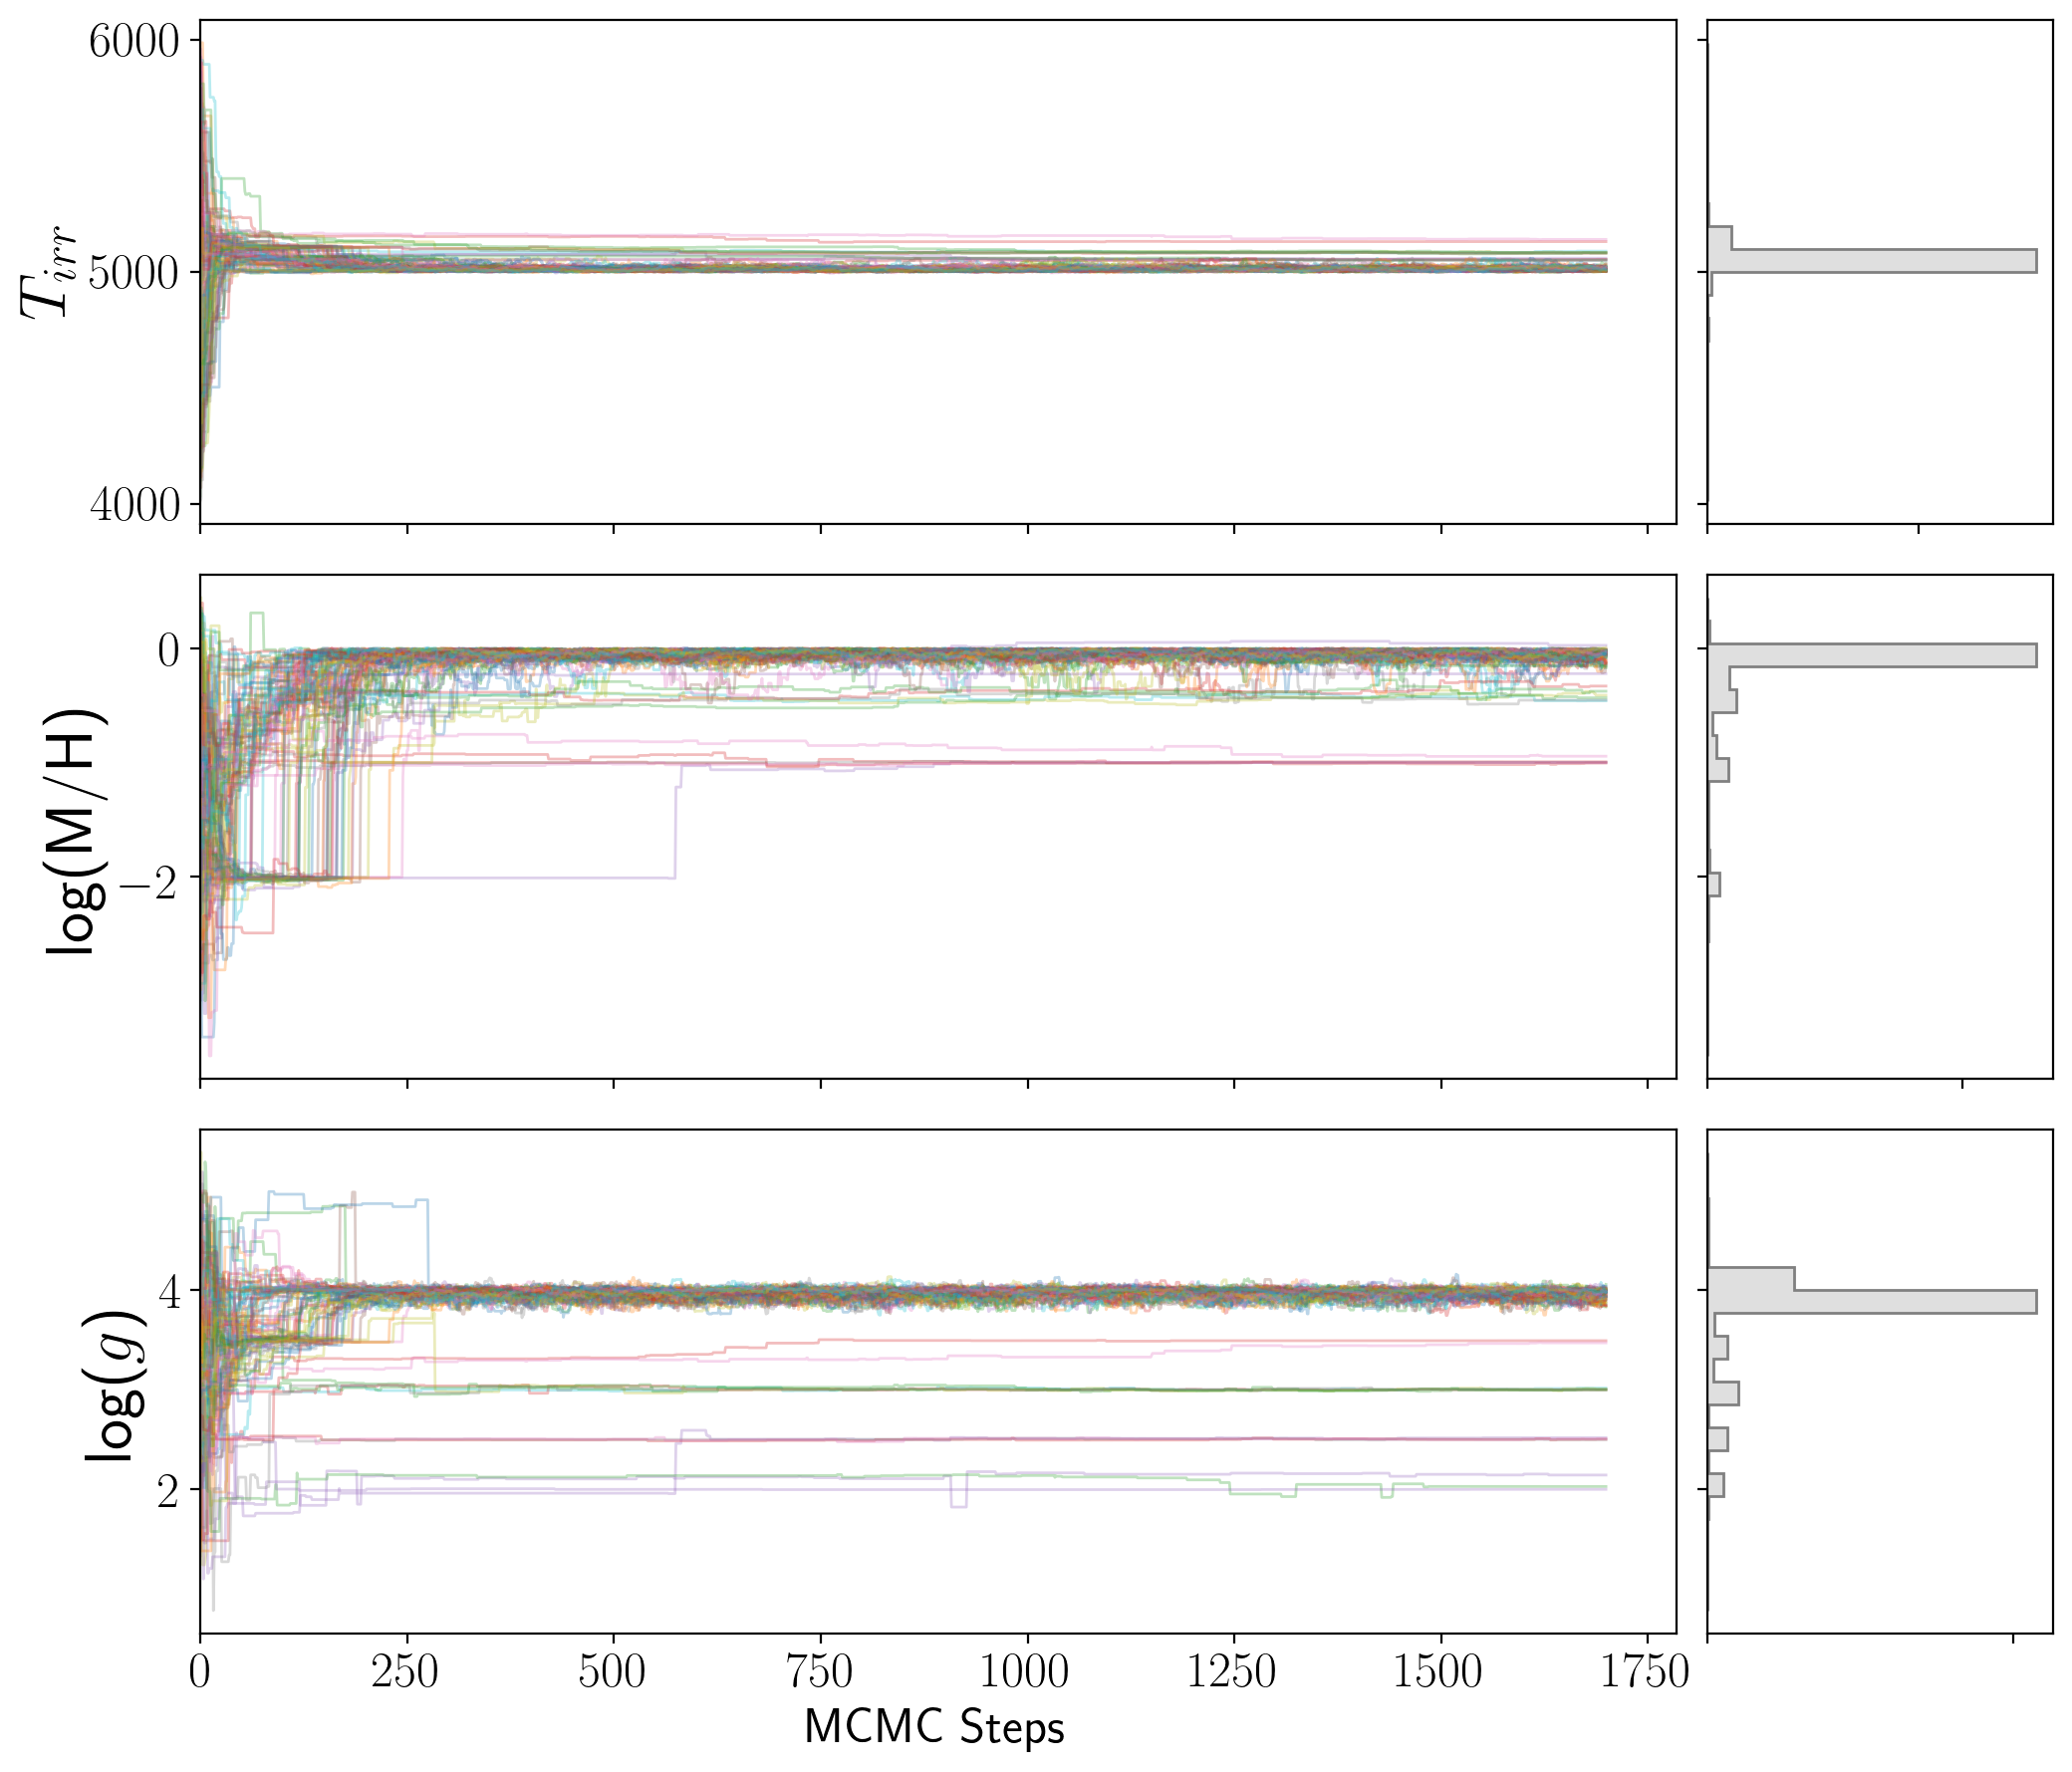

In [44]:
fig, ax = plot_mcmc_trace("example", saveplot=False, emcee_backend=sampler.backend, 
                          labels = ["$T_{irr}$", "log(M/H)", "log($g$)"])

In [45]:
flatchain = sampler.get_chain(flat=True, discard = 400)

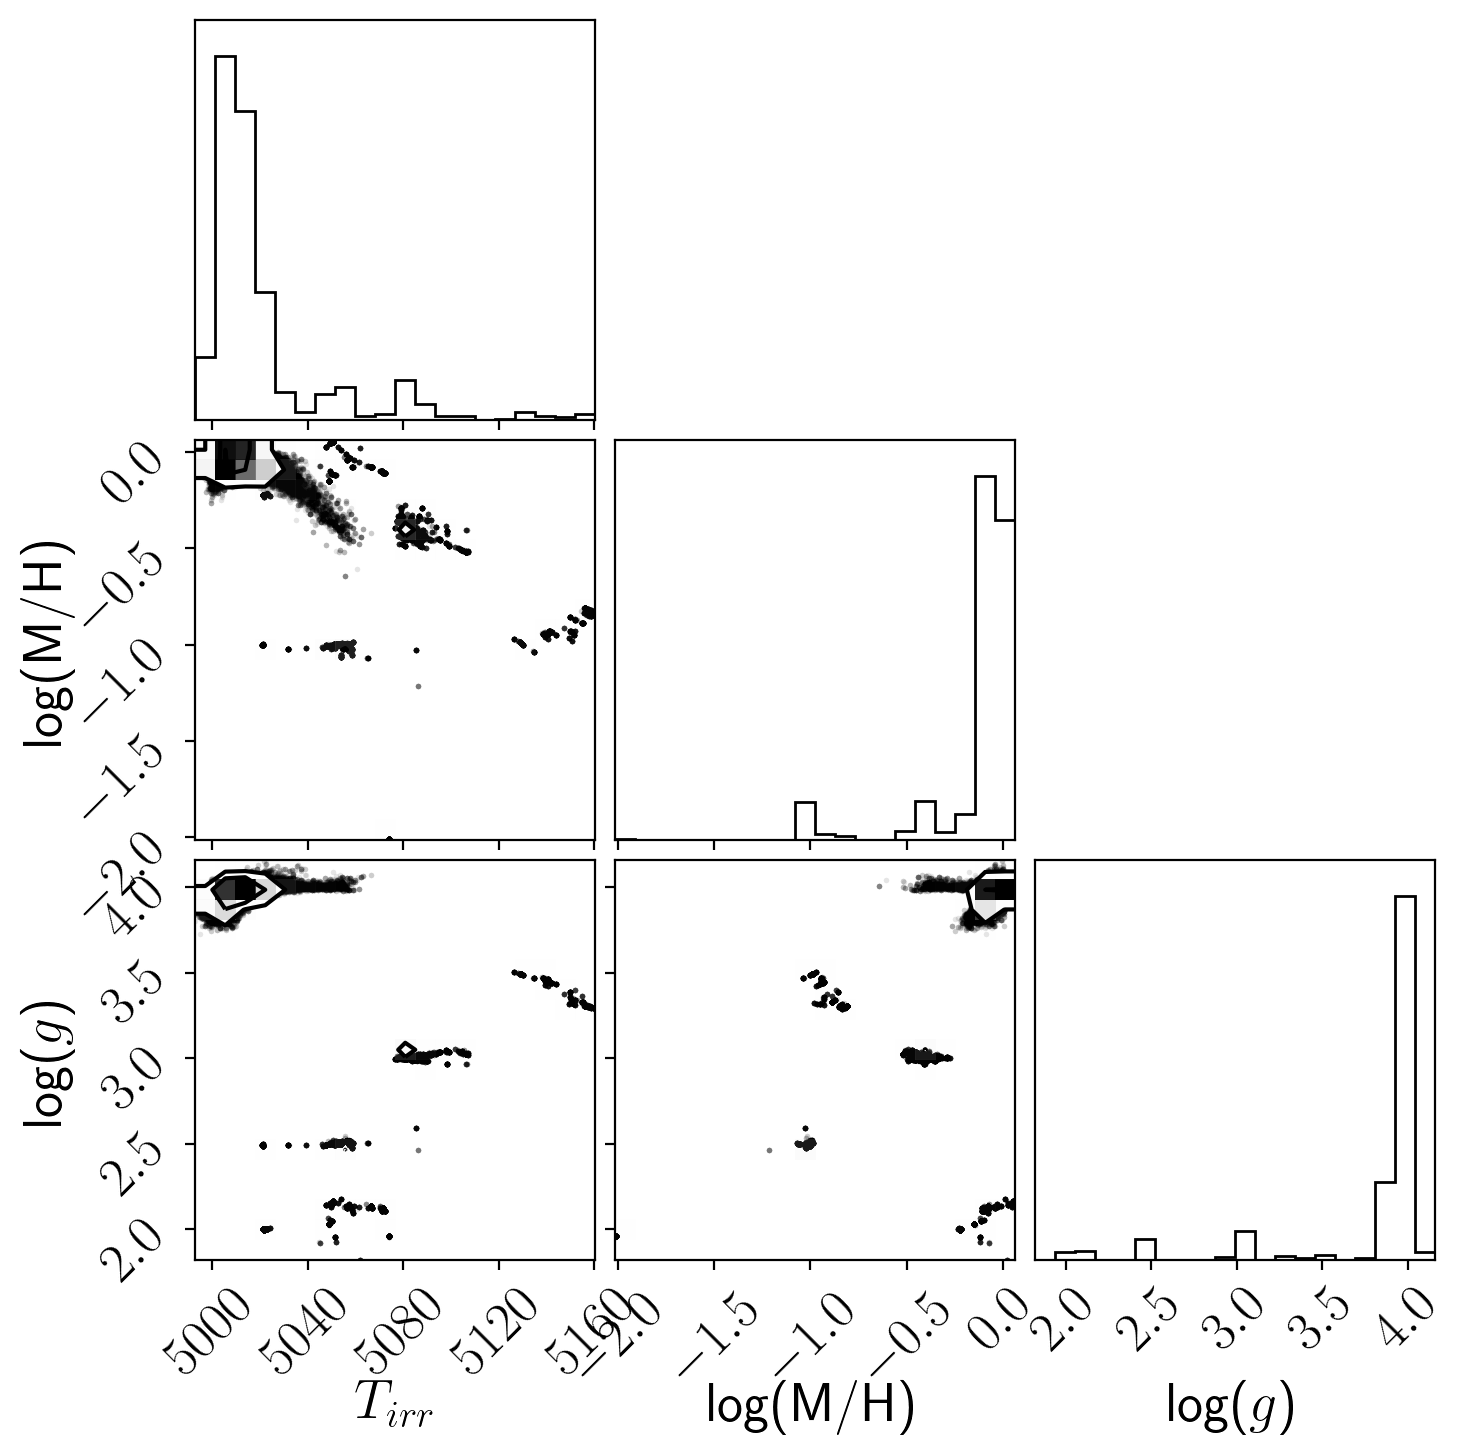

In [46]:
fig = corner.corner(flatchain, labels = ["$T_{irr}$", "log(M/H)", "log($g$)"])